**Import Library**

In [ ]:
import pandas as pd #untuk memproses data, manipulasi data, dan analisis data
import numpy as np #fungsi untuk aljabar linier dan pembuatan bilangan acak
import matplotlib.pyplot as plt #untuk visualisasi data seperti plot, histogram, bar chart, dll
%matplotlib inline
import seaborn as sns #untuk menampilkan visualisasi data lebih menarik
import warnings

#--Sklearn library-- membantu melakukan processing data ataupun melakukan training data
from sklearn.model_selection import train_test_split #membagi data secara acak
from sklearn.metrics import confusion_matrix, classification_report #untuk memplot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #untuk memplot confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #model performance
from sklearn import metrics

#Membangun model Decition Tree
from yellowbrick.target import ClassBalance
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

**Data Understanding**

In [ ]:
# Importing data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/df_EDA.csv")

In [ ]:
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

495467 rows and 14 columns


In [ ]:
df.head()

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0


In [ ]:
df.tail()

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0
495466,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Idaho Falls, ID",-2,75,458,Feb,Mon,0


In [ ]:
print ("Features : \n\n", df.columns.tolist()) #mengetahui nama kolom/fitur

Features : 

 ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status']


In [ ]:
print ("Missing values :\n\n", df.isnull().sum().sort_values(ascending=False)) #menghitung nilai null

Missing values :

 Quarter           0
Month             0
DayofMonth        0
DayOfWeek         0
FlightDate        0
Airlines          0
OriginCityName    0
DestCityName      0
DepDelay          0
AirTime           0
Distance          0
Month_Str         0
DayOfWeek_Str     0
Flight_Status     0
dtype: int64


In [ ]:
print ("Unique values :  \n\n", df.nunique())  #menghitung unique values

Unique values :  

 Quarter              1
Month                1
DayofMonth          28
DayOfWeek            7
FlightDate          28
Airlines            10
OriginCityName     361
DestCityName       361
DepDelay          1032
AirTime            614
Distance          1473
Month_Str            1
DayOfWeek_Str        7
Flight_Status        2
dtype: int64


In [ ]:
num_duplicate_rows = df.duplicated().sum() #menghitung data yang duplikat
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  3674


In [ ]:
df.drop_duplicates(inplace=True)
df

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0


In [ ]:
num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491793 entries, 0 to 495466
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Quarter         491793 non-null  int64 
 1   Month           491793 non-null  int64 
 2   DayofMonth      491793 non-null  int64 
 3   DayOfWeek       491793 non-null  int64 
 4   FlightDate      491793 non-null  object
 5   Airlines        491793 non-null  object
 6   OriginCityName  491793 non-null  object
 7   DestCityName    491793 non-null  object
 8   DepDelay        491793 non-null  int64 
 9   AirTime         491793 non-null  int64 
 10  Distance        491793 non-null  int64 
 11  Month_Str       491793 non-null  object
 12  DayOfWeek_Str   491793 non-null  object
 13  Flight_Status   491793 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 56.3+ MB


In [ ]:
target='Flight_Status'
numfeat, catfeat = list(df.select_dtypes(include=np.number)), list(df.select_dtypes(exclude=np.number)); numfeat.remove(target)
df

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0


In [ ]:
numfeat

['Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepDelay',
 'AirTime',
 'Distance']

In [ ]:
catfeat

['FlightDate',
 'Airlines',
 'OriginCityName',
 'DestCityName',
 'Month_Str',
 'DayOfWeek_Str']

**Data Analysis**

In [ ]:
df.describe()

,Quarter,Month,DayofMonth,DayOfWeek,DepDelay,AirTime,Distance,Flight_Status
count,491793.0,491793.0,491793.000000,491793.000000,491793.000000,491793.000000,491793.000000,491793.000000
mean,1.0,2.0,14.858906,3.965768,11.360619,112.215971,803.287298,0.190958
std,0.0,0.0,7.979054,2.026665,51.727175,70.285127,591.022406,0.393057
min,1.0,2.0,1.000000,1.000000,-78.000000,8.000000,31.000000,0.000000
25%,1.0,2.0,8.000000,2.000000,-5.000000,60.000000,369.000000,0.000000
50%,1.0,2.0,15.000000,4.000000,-2.000000,95.000000,651.000000,0.000000
75%,1.0,2.0,22.000000,6.000000,8.000000,142.000000,1046.000000,0.000000
max,1.0,2.0,28.000000,7.000000,2545.000000,668.000000,5095.000000,1.000000


In [ ]:
#korelasi dengan Flight_Status
corr=df.corr()
corr.sort_values(by=["Flight_Status"],ascending=False).iloc[0].sort_values(ascending=False)

Flight_Status    1.000000
DepDelay         0.505847
DayofMonth       0.070686
DayOfWeek        0.052910
AirTime          0.033003
Distance         0.016588
Quarter               NaN
Month                 NaN
Name: Flight_Status, dtype: float64

**Data Preparation**

In [ ]:
dfmodel = df.iloc[0:5000]

In [ ]:
print ("Unique values top_cities :  \n\n", dfmodel.nunique())  #menghitung unique values

Unique values top_cities :  

 Quarter             1
Month               1
DayofMonth          1
DayOfWeek           1
FlightDate          1
Airlines            4
OriginCityName    252
DestCityName      251
DepDelay          147
AirTime           285
Distance          808
Month_Str           1
DayOfWeek_Str       1
Flight_Status       2
dtype: int64


In [ ]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5042
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Quarter         5000 non-null   int64 
 1   Month           5000 non-null   int64 
 2   DayofMonth      5000 non-null   int64 
 3   DayOfWeek       5000 non-null   int64 
 4   FlightDate      5000 non-null   object
 5   Airlines        5000 non-null   object
 6   OriginCityName  5000 non-null   object
 7   DestCityName    5000 non-null   object
 8   DepDelay        5000 non-null   int64 
 9   AirTime         5000 non-null   int64 
 10  Distance        5000 non-null   int64 
 11  Month_Str       5000 non-null   object
 12  DayOfWeek_Str   5000 non-null   object
 13  Flight_Status   5000 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 585.9+ KB


In [ ]:
print(f'{dfmodel.shape[0]} rows and {dfmodel.shape[1]} columns')

5000 rows and 14 columns


In [ ]:
print ("Features : \n\n", df.columns.tolist()) #mengetahui nama kolom/fitur

Features : 

 ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status']


In [ ]:
dfmodel = dfmodel.drop(['Quarter', 'Month', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'Month_Str', 'DayOfWeek_Str'], axis=1)

In [ ]:
dfmodel.columns

Index(['DayofMonth', 'DayOfWeek', 'DepDelay', 'AirTime', 'Distance',
       'Flight_Status'],
      dtype='object')

In [ ]:
print(f'{dfmodel.shape[0]} rows and {dfmodel.shape[1]} columns')

5000 rows and 6 columns


In [ ]:
# Make scaling data method
def scaling_check(data):

    case_count = dfmodel['Flight_Status'].value_counts()
    print('Legend:')
    print(case_count)

    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['On Time (0)', 'Delayed (1)'])
    plt.show()

Legend:
0    4641
1     359
Name: Flight_Status, dtype: int64


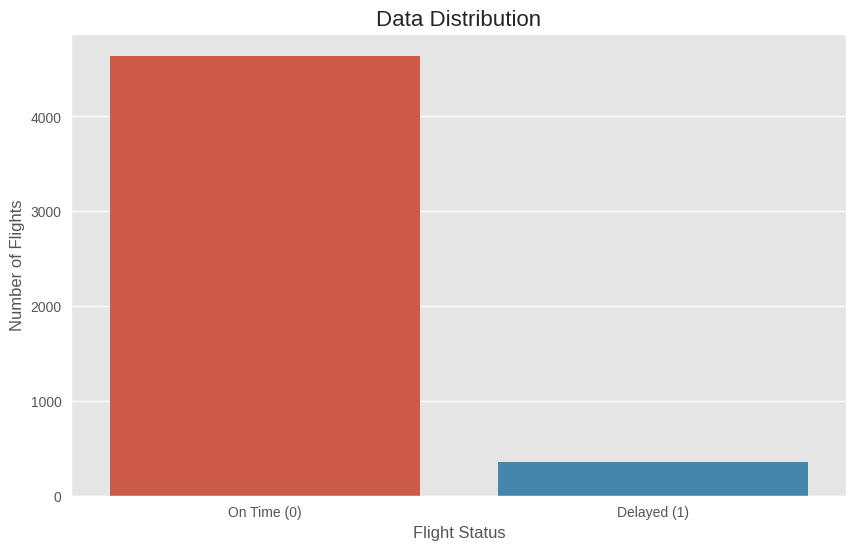

In [ ]:
# Checking scaling data from Dataframe "dfmodel"
scaling_check(dfmodel)

**Building Model**

In [ ]:
#menentukan variabel
X = dfmodel.drop('Flight_Status', axis=1)
y = dfmodel['Flight_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
X_train.shape

(3500, 5)

In [ ]:
X_test.shape

(1500, 5)

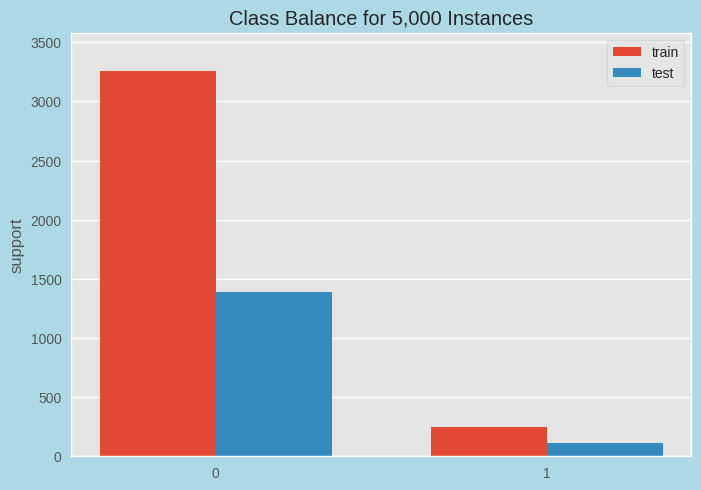

<Axes: title={'center': 'Class Balance for 5,000 Instances'}, ylabel='support'>

In [ ]:
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y_train, y_test)
visualizer.poof()

**Decision Tree Process**

In [ ]:
param_grid = {'max_depth': [5, 10, 15, 20, 25, None]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best max_depth:", grid_search.best_params_['max_depth'])

Best max_depth: 5


In [ ]:
model = DecisionTreeClassifier(criterion= 'gini', class_weight={0:0.2,1:0.8},max_depth=grid_search.best_params_['max_depth'])
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5)

Test Accuracy: 94.00%


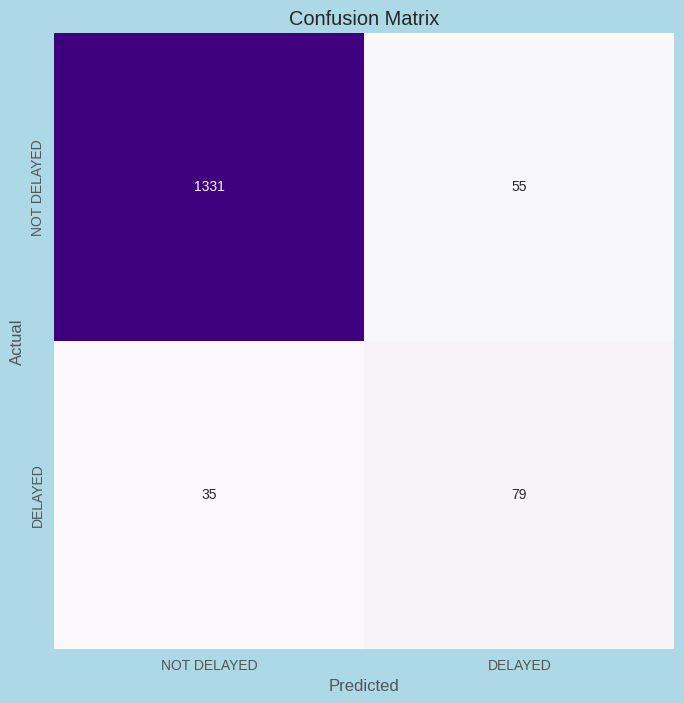

Classification Report:
----------------------
               precision    recall  f1-score   support

 NOT DELAYED       0.97      0.96      0.97      1386
     DELAYED       0.59      0.69      0.64       114

    accuracy                           0.94      1500
   macro avg       0.78      0.83      0.80      1500
weighted avg       0.95      0.94      0.94      1500



In [ ]:
model_acc = model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(model_acc * 100))

y_true = np.array(y_test)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=["NOT DELAYED", "DELAYED"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Purples', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

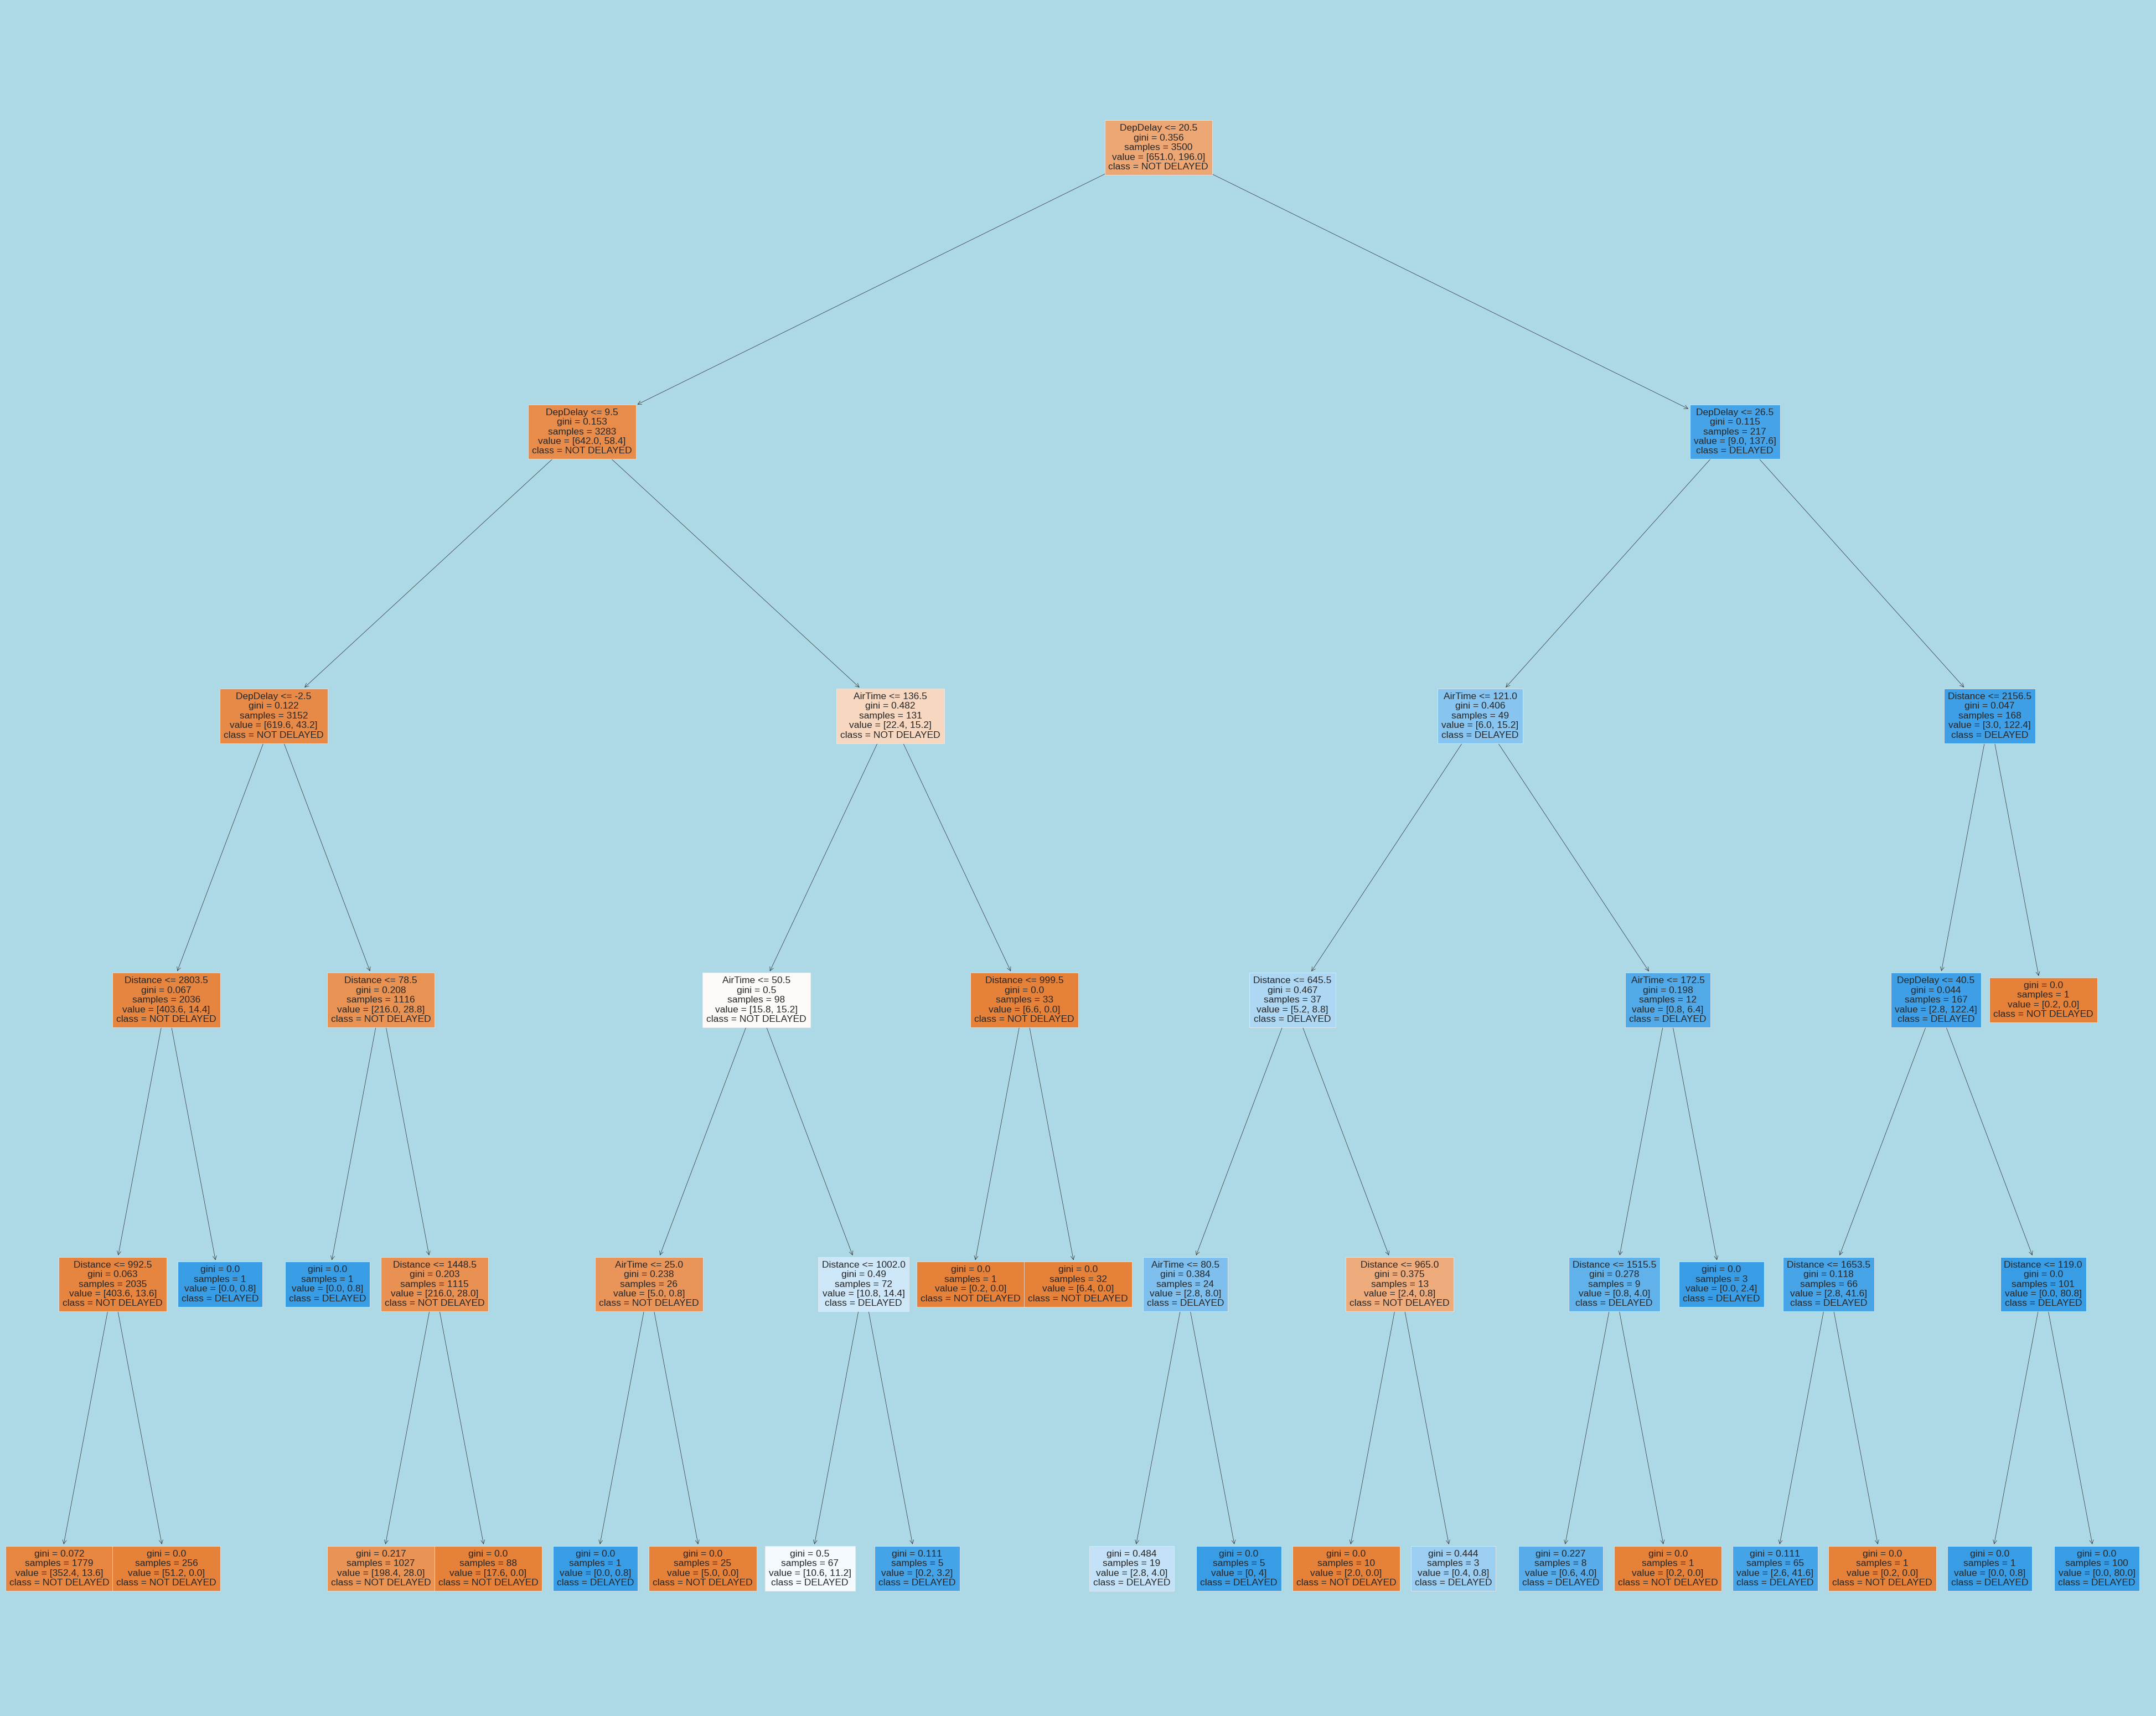

In [ ]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=["NOT DELAYED", "DELAYED"],
                   filled=True)

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['DayofMonth', 'DayOfWeek', 'DepDelay', 'AirTime', 'Distance']


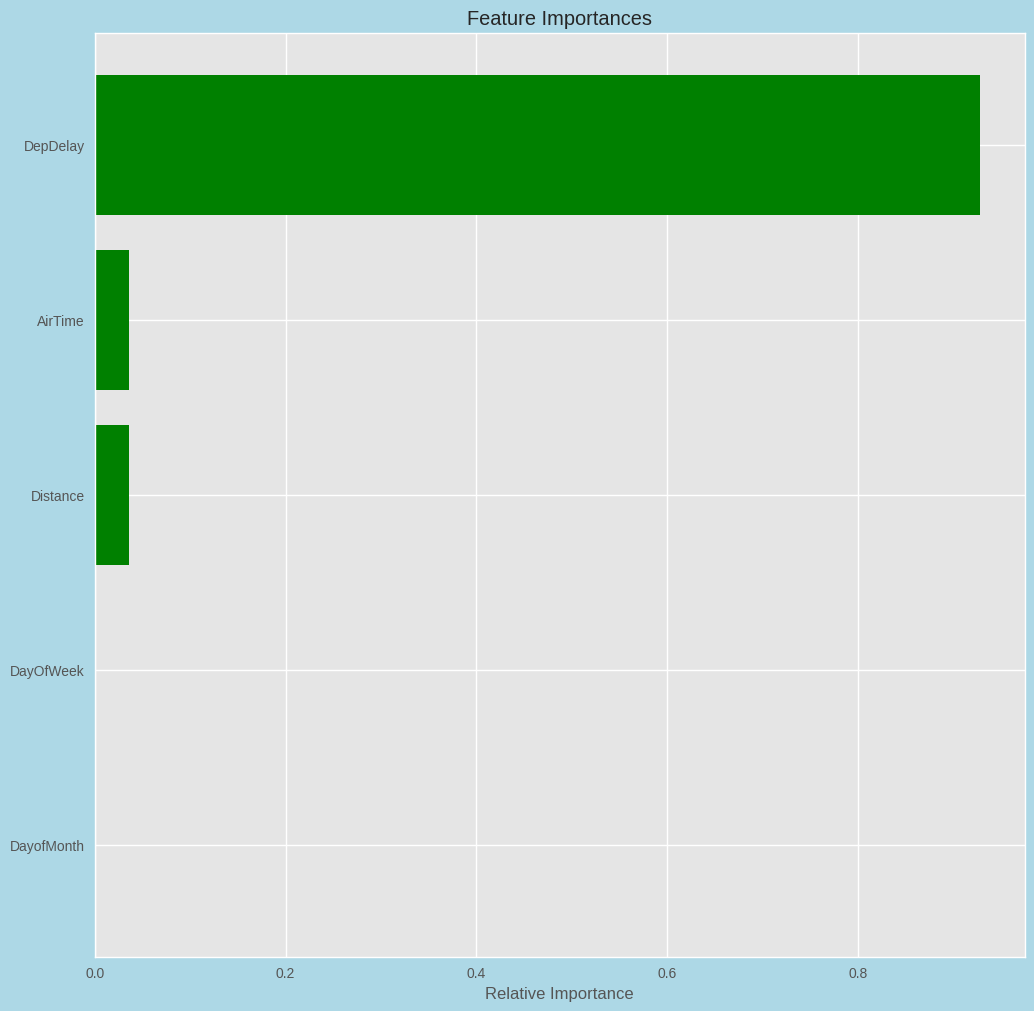

In [ ]:
#variabel yang berpengaruh dalam menentukan memprediksi delay pesawat
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()